<a href="https://colab.research.google.com/github/Skula33/FDSfE_SKulakowski/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pylab as plt

In [2]:
from sklearn.datasets import load_digits

In [5]:
mnist = load_digits()

In [7]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [9]:
mnist.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [10]:
mnist.data.shape

(1797, 64)

In [12]:
mnist.images.shape

(1797, 8, 8)

In [13]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

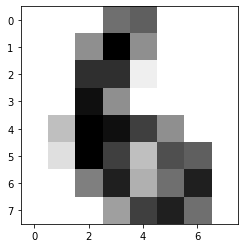

In [20]:
plt.imshow(mnist.images[65], cmap = 'binary');

In [21]:
mnist.target.shape

(1797,)

In [22]:
X = mnist.data
y = mnist.target

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 142, stratify = y)

In [26]:
X_train.shape

(1257, 64)

In [27]:
y_train.shape

(1257,)

In [28]:
X_test.shape

(540, 64)

In [29]:
y_test.shape

(540,)

In [31]:
from sklearn.neural_network import MLPClassifier

In [46]:
mlp = MLPClassifier(activation = 'relu', hidden_layer_sizes = (40,40), 
                    random_state = 23, verbose = 1, max_iter = 400)

In [47]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 4.29945912
Iteration 2, loss = 2.68482377
Iteration 3, loss = 1.97242725
Iteration 4, loss = 1.56937206
Iteration 5, loss = 1.30425494
Iteration 6, loss = 1.08796143
Iteration 7, loss = 0.91494477
Iteration 8, loss = 0.77029295
Iteration 9, loss = 0.65249755
Iteration 10, loss = 0.55847769
Iteration 11, loss = 0.48319741
Iteration 12, loss = 0.42155615
Iteration 13, loss = 0.37391418
Iteration 14, loss = 0.33368111
Iteration 15, loss = 0.30171686
Iteration 16, loss = 0.27324381
Iteration 17, loss = 0.24945927
Iteration 18, loss = 0.22652314
Iteration 19, loss = 0.20796435
Iteration 20, loss = 0.19226664
Iteration 21, loss = 0.17775810
Iteration 22, loss = 0.16531163
Iteration 23, loss = 0.15397150
Iteration 24, loss = 0.14336258
Iteration 25, loss = 0.13357831
Iteration 26, loss = 0.12586367
Iteration 27, loss = 0.11760163
Iteration 28, loss = 0.11094345
Iteration 29, loss = 0.10493218
Iteration 30, loss = 0.09943060
Iteration 31, loss = 0.09341165
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(40, 40), max_iter=400, random_state=23,
              verbose=1)

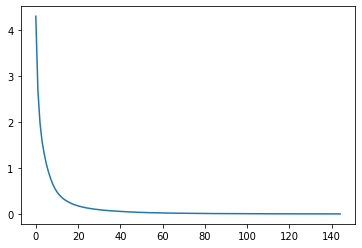

In [48]:
plt.plot(mlp.loss_curve_);

In [49]:
mlp.score(X_train, y_train)

1.0

In [50]:
mlp.score(X_test, y_test)

0.9629629629629629

In [51]:
from sklearn.metrics import classification_report

In [52]:
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.95      0.98      0.96        55
           2       0.95      0.98      0.96        53
           3       1.00      0.91      0.95        55
           4       1.00      1.00      1.00        54
           5       0.96      1.00      0.98        55
           6       1.00      0.98      0.99        54
           7       0.96      0.96      0.96        54
           8       0.90      0.90      0.90        52
           9       0.93      0.93      0.93        54

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(y_test, y_pred)

array([[53,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  1,  0,  1,  2,  1],
       [ 0,  0,  0,  0, 54,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 55,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 52,  0,  2],
       [ 0,  2,  2,  0,  0,  0,  0,  0, 47,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  2, 50]])